In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/HP/Desktop/spam ham classifier/archive (2)/spam_ham_dataset.csv")


In [3]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [4]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
df.sample(5)

,Unnamed: 0,label,text,label_num
2179,769,ham,Subject: enron mid - year 2000 performance man...,0
3468,3481,ham,Subject: poem\r\nhttp : / / my . servepics . c...,0
622,631,ham,Subject: ces - carthage\r\ni decreased volumes...,0
529,3254,ham,Subject: lonestar cleburne payback\r\ndaren - ...,0
4554,347,ham,Subject: see attached memo\r\nplease read the ...,0


In [6]:
#stages

In [7]:
# 1. data cleaning
# 2. Exploratory data analysis
#3. text processing
# 4.model building
# 5.Evaluation 
# 6.improvement
# 7.website
# 8. Deploy

In [8]:
## 1. data cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [10]:
# in this data there are no null values
# this step is only for learning purposes
#df.drop(columns=['Unnamed: 0','label','label_num'],inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [12]:
#df.drop(columns=['text'],inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [14]:
df.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [15]:
#renaming the columns

In [16]:
df.rename(columns={'label':'target','label_num':'none','text':'sentance'},inplace = True )

In [17]:
df.sample(3)

,Unnamed: 0,target,sentance,none
1927,2550,ham,Subject: tenaska 11 / 00 and 12 / 00\r\nwe hav...,0
4598,773,ham,"Subject: gepl volumes\r\nhey debbie ,\r\njust ...",0
1419,2146,ham,"Subject: camden resources , inc .\r\nteam ,\r\...",0


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [19]:
df['target'] = encoder.fit_transform(df['target'])

In [20]:
df.head(5)

,Unnamed: 0,target,sentance,none
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0


In [21]:
#missing values
df.isnull().sum()

Unnamed: 0    0
target        0
sentance      0
none          0
dtype: int64

In [22]:
# checking missing values
df.duplicated().sum()

0

In [23]:
# removing duplicate values
df = df.drop_duplicates(keep = 'first')

In [24]:
df.duplicated().sum()

0

In [25]:
df.shape

(5171, 4)

In [26]:
# EDA

In [27]:
df['target'].value_counts()

target
0    3672
1    1499
Name: count, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [29]:
df['target'] = encoder.fit_transform(df['target'])

In [30]:
df.head(4)

,Unnamed: 0,target,sentance,none
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1


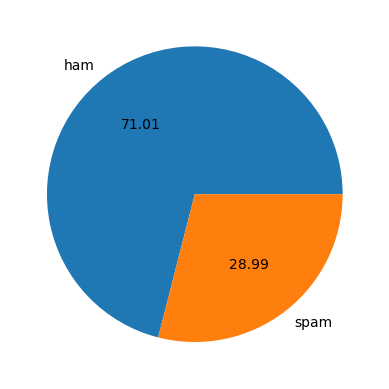

In [31]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [32]:
# data is imbalance

In [33]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [34]:
import nltk

In [35]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
df['none']

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: none, Length: 5171, dtype: int64

In [37]:
df['num_characters']=df['sentance'].apply(len)

In [38]:
df.head()

,Unnamed: 0,target,sentance,none,num_characters
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0,336


In [39]:
# no. of words

In [40]:
df['num_words']=df['sentance'].apply(lambda x : len(nltk.word_tokenize(x)))

In [41]:
df.head(5)

,Unnamed: 0,target,sentance,none,num_characters,num_words
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0,336,71


In [42]:
df['num_sentence']=df['sentance'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [43]:
df.head(5)

,Unnamed: 0,target,sentance,none,num_characters,num_words,num_sentence
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [44]:
df[['num_characters','num_sentence','num_words']].describe()

,num_characters,num_sentence,num_words
count,5171.000000,5171.000000,5171.000000
mean,1048.391994,13.121253,229.181009
std,1528.513435,27.541637,336.487397
min,11.000000,1.000000,2.000000
25%,244.000000,4.000000,52.000000
50%,540.000000,7.000000,122.000000
75%,1237.000000,15.000000,283.500000
max,32258.000000,1204.000000,8863.000000


In [45]:
#ham
df[df['target']==0][['num_characters','num_sentence','num_words']].describe()

,num_characters,num_sentence,num_words
count,3672.000000,3672.000000,3672.000000
mean,977.008170,11.440904,226.239107
std,1382.827493,24.892442,332.179661
min,18.000000,1.000000,3.000000
25%,231.750000,3.000000,51.000000
50%,530.000000,6.000000,124.000000
75%,1227.250000,13.000000,294.000000
max,32258.000000,1204.000000,8863.000000


In [46]:
#spam
df[df['target']==1][['num_characters','num_sentence','num_words']].describe()

,num_characters,num_sentence,num_words
count,1499.000000,1499.000000,1499.000000
mean,1223.256171,17.237492,236.387592
std,1825.986210,32.796043,346.821249
min,11.000000,1.000000,2.000000
25%,283.000000,4.000000,55.000000
50%,576.000000,9.000000,116.000000
75%,1253.500000,18.500000,244.000000
max,22073.000000,693.000000,3963.000000


In [47]:
import seaborn as sns 

<Axes: xlabel='num_characters', ylabel='Count'>

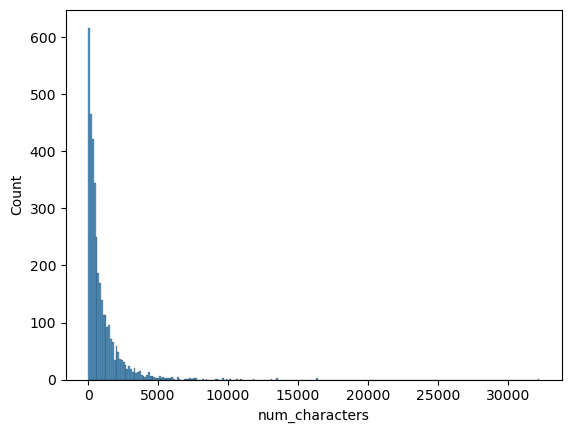

In [48]:
sns.histplot(df[df['target']==0]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

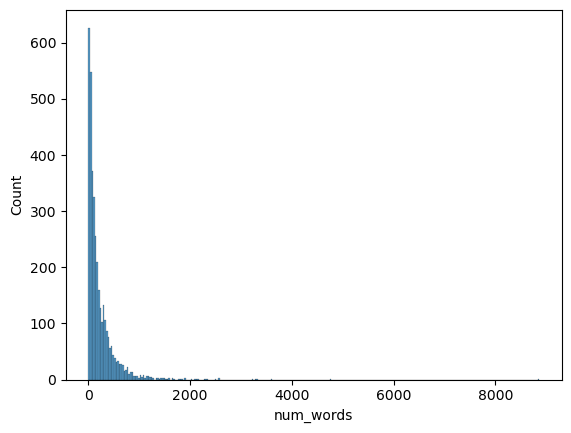

In [49]:
sns.histplot(df[df['target']==0]['num_words'])

<Axes: xlabel='num_sentence', ylabel='Count'>

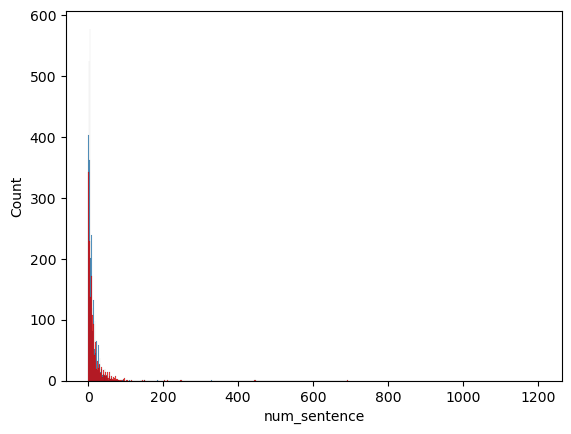

In [50]:
sns.histplot(df[df['target']==0]['num_sentence'])
sns.histplot(df[df['target']==1]['num_sentence'],color='red')

<Axes: ylabel='num_characters'>

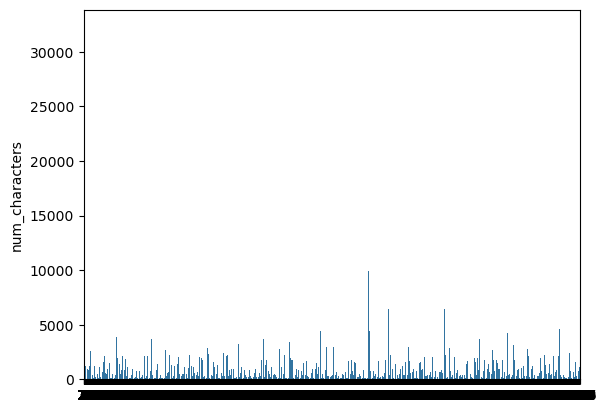

In [51]:
sns.barplot(df[df['target']==0]['num_characters'])

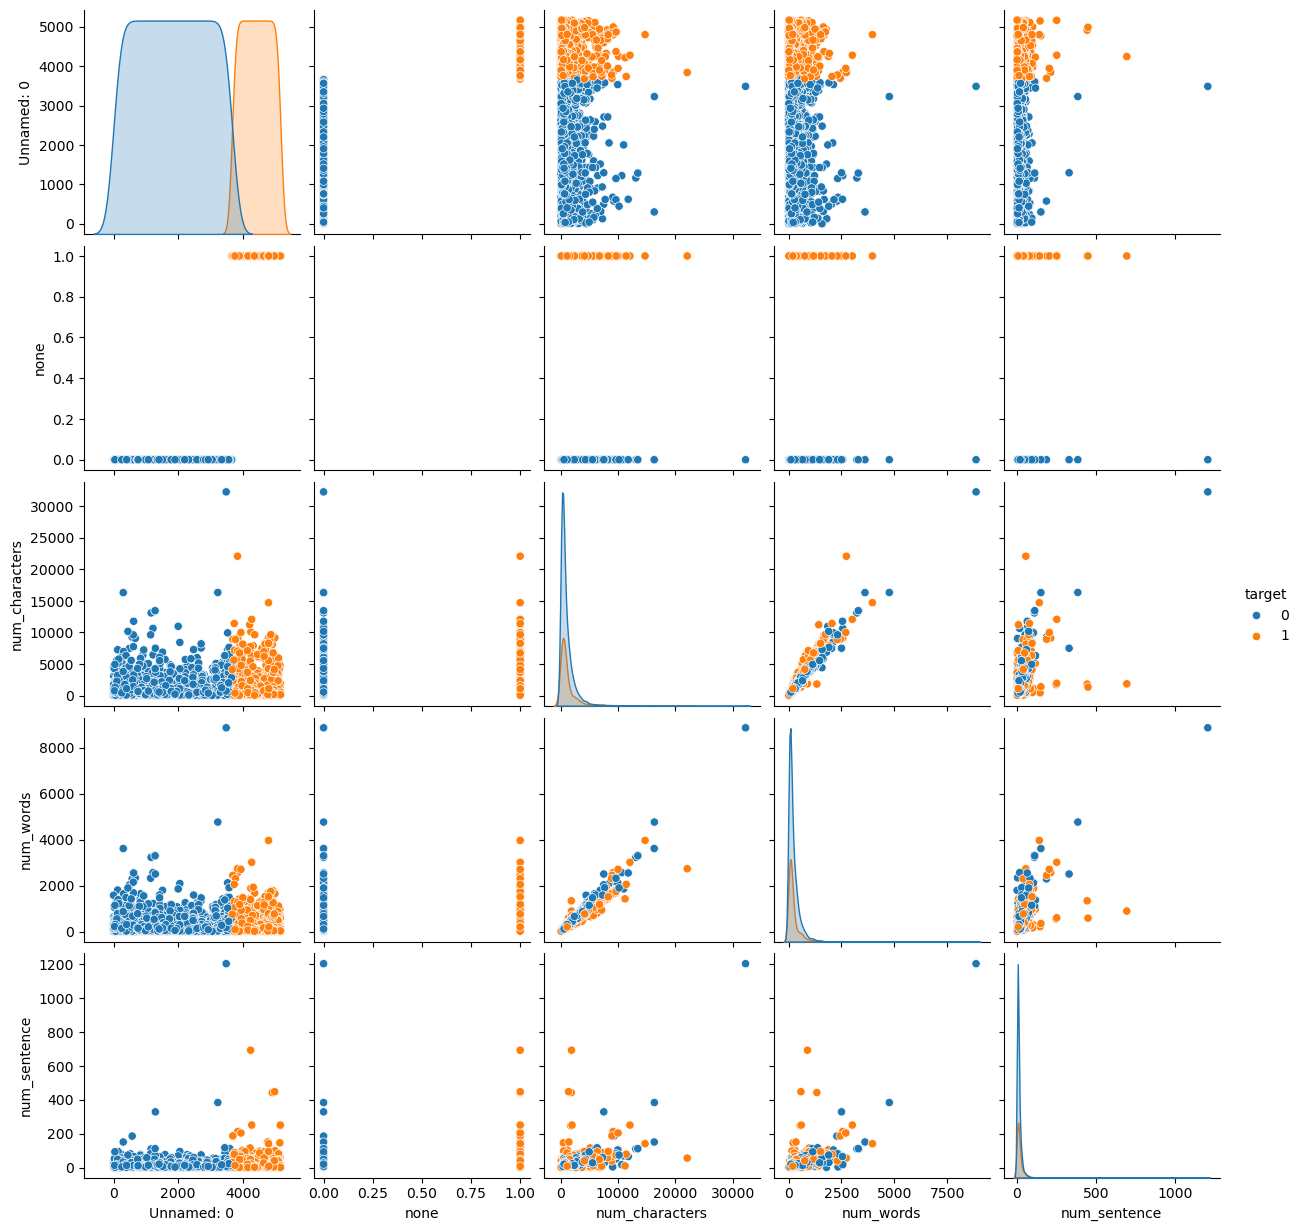

In [52]:
sns.pairplot(df,hue='target')

In [53]:
df.describe()

,Unnamed: 0,target,none,num_characters,num_words,num_sentence
count,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000
mean,2585.000000,0.289886,0.289886,1048.391994,229.181009,13.121253
std,1492.883452,0.453753,0.453753,1528.513435,336.487397,27.541637
min,0.000000,0.000000,0.000000,11.000000,2.000000,1.000000
25%,1292.500000,0.000000,0.000000,244.000000,52.000000,4.000000
50%,2585.000000,0.000000,0.000000,540.000000,122.000000,7.000000
75%,3877.500000,1.000000,1.000000,1237.000000,283.500000,15.000000
max,5170.000000,1.000000,1.000000,32258.000000,8863.000000,1204.000000


<Axes: >

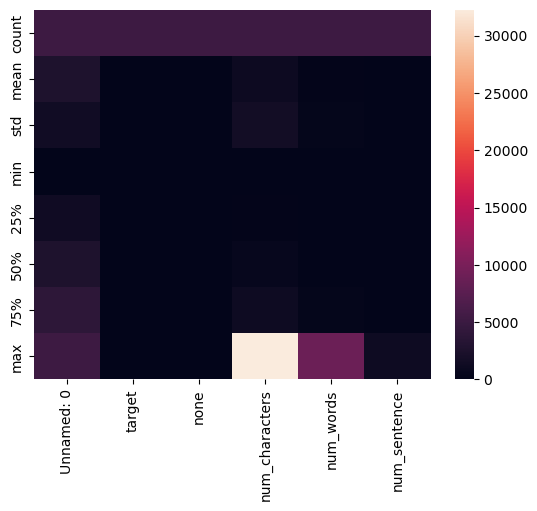

In [54]:
sns.heatmap(df.describe(),color='red')

In [55]:
#pip install nltk

In [56]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)


{'was', 'you', 'which', 'what', 'who', 'nor', "mightn't", 'after', "should've", 'to', 'more', 'the', 'up', 'on', 'through', 'most', 'whom', 'now', "wouldn't", 'and', 'as', 'where', 'myself', 'them', 'few', "don't", 'ain', "didn't", 'himself', 'should', "doesn't", 'having', "she's", 'his', 'once', 'haven', "shan't", 'there', 'do', 'itself', "mustn't", 'ourselves', 'they', 'be', 'but', 'hers', "you'll", 'again', 'him', 'doesn', 'why', "it's", 'any', 'didn', 'not', 'how', "couldn't", 'herself', 'own', 've', "aren't", 'your', 'before', 't', "wasn't", 'does', 'her', 'with', 'mightn', 'down', 'then', 'or', 'i', 'theirs', 'can', 'has', 'such', 'y', 'at', 'during', "needn't", 'same', 'will', 'had', 'only', 'themselves', 'it', 'm', 'those', 'have', 'of', 'isn', 'no', "you'd", 'did', 'both', "you're", "shouldn't", 'because', 'were', 'aren', 'over', 'weren', "haven't", 'my', 'until', "that'll", 'if', 'above', 'their', 'here', 'couldn', 'in', 'a', 're', "isn't", 'hasn', 'mustn', 'being', 'each', '

In [59]:
import string

# Get all punctuation characters
punctuation_chars = string.punctuation
print(punctuation_chars)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [60]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()


In [61]:
def transform_text(text):
    text=text.lower()
    text = nltk.word_tokenize(text)

    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text =y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)
            

    
    
    
     

In [62]:
transform_text(' Did you liked to dancing my presentation on ML. 20%%%%%% ?')

'like danc present ml 20'

In [63]:
df['sentance'].apply(transform_text)



0       subject enron methanol meter 988291 follow not...
1       subject hpl nom januari 9 2001 see attach file...
2       subject neon retreat ho ho ho around wonder ti...
3       subject photoshop window offic cheap main tren...
4       subject indian spring deal book teco pvr reven...
                              ...                        
5166    subject put 10 ft transport volum decreas 2500...
5167    subject 3 4 2000 follow nom hpl take extra 15 ...
5168    subject calpin daili ga nomin juli mention ear...
5169    subject industri worksheet august 2000 activ a...
5170    subject import onlin bank alert dear valu citi...
Name: sentance, Length: 5171, dtype: object

In [64]:
df.head(5)

,Unnamed: 0,target,sentance,none,num_characters,num_words,num_sentence
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [65]:
df['processed_data']=df['sentance'].apply(transform_text)

In [66]:
df.head(5)

,Unnamed: 0,target,sentance,none,num_characters,num_words,num_sentence,processed_data
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [67]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


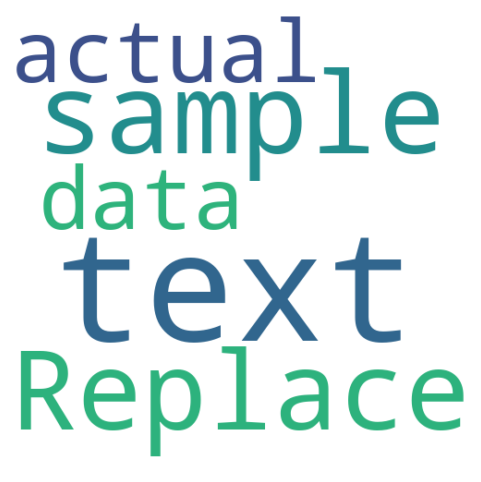

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example text (replace with your own data)
text = "This is some sample text. Replace it with your actual text data."

# Create a WordCloud instance
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Generate the word cloud
wordcloud = wc.generate(text)

# Display the word cloud
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


                      

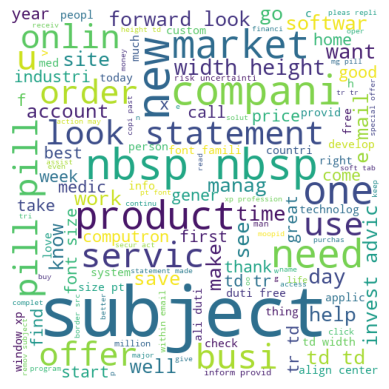

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['processed_data'].str.cat(sep=" "))

plt.imshow(spam_wc)
plt.axis("off")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

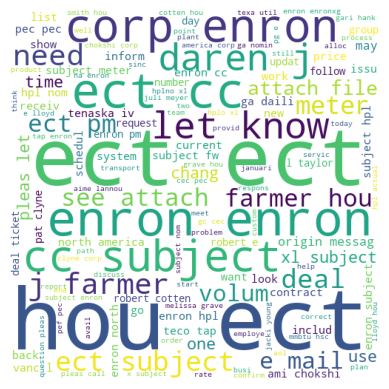

In [70]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
ham_wc = wc.generate(df[df['target']==0]['processed_data'].str.cat(sep=" "))
plt.imshow(ham_wc)
plt.axis("off")
plt.show

In [71]:
spam_corpus=[]
for msg in df[df['target']==1]['processed_data'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [72]:
len(spam_corpus)

197452

In [73]:
len(spam_corpus)

197452

In [74]:
pip install collection

Note: you may need to restart the kernel to use updated packages.


In [76]:
#model building

In [77]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer()
tfidf=TfidfVectorizer()

In [102]:
X = tfidf.fit_transform(df['processed_data']).toarray()

In [ ]:
y.df['target'].value

In [ ]:
X.shape

In [ ]:
y = df['target'].values

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

In [ ]:
#tfidf --> mnb

In [90]:
pip install scikit-learn

In [91]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [104]:
svc= SVC(kernel = 'sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc= LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)


In [105]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

In [97]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)


    print("For " ,name)
    print("Accuracy - ",current_accuracy)
    print("precision -",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9884057971014493
precision - 0.9601328903654485
For  KN
Accuracy -  0.9671497584541063
precision - 0.9811320754716981
For  NB
Accuracy -  0.9227053140096618
precision - 1.0
For  DT
Accuracy -  0.8628019323671497
precision - 0.8
For  LR
Accuracy -  0.966183574879227
precision - 0.89937106918239
For  RF
Accuracy -  0.9855072463768116
precision - 0.959731543624161


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.966183574879227
precision - 0.9205298013245033
For  BgC
Accuracy -  0.9584541062801932
precision - 0.9270833333333334
For  ETC
Accuracy -  0.9864734299516909
precision - 0.9629629629629629
For  GBDT
Accuracy -  0.9458937198067633
precision - 0.9298892988929889
For  xgb
Accuracy -  0.9710144927536232
precision - 0.9245901639344263


In [100]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Prescision':precision_scores}).sort_values('Accuracy',ascending=False) 

In [106]:
performance_df

,Algorithm,Accuracy,Prescision
0,SVC,0.988406,0.960133
8,ETC,0.986473,0.962963
5,RF,0.985507,0.959732
10,xgb,0.971014,0.924590
1,KN,0.967150,0.981132
4,LR,0.966184,0.899371
6,AdaBoost,0.966184,0.920530
7,BgC,0.958454,0.927083
9,GBDT,0.945894,0.929889
2,NB,0.922705,1.000000


In [115]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [116]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.988406
1,ETC,Accuracy,0.986473
2,RF,Accuracy,0.985507
3,xgb,Accuracy,0.971014
4,KN,Accuracy,0.967150
5,LR,Accuracy,0.966184
6,AdaBoost,Accuracy,0.966184
7,BgC,Accuracy,0.958454
8,GBDT,Accuracy,0.945894
9,NB,Accuracy,0.922705


In [118]:
# voting clssifier
svc = SVC(kernel = 'sigmoid',gamma = 1.0,probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [121]:
voting = VotingClassifier(estimators=[('svm',svc), ('nb',mnb),('et',etc)],voting='soft')

In [122]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [124]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))

Accuracy 0.991304347826087
precision 0.9794520547945206


In [142]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))